In [ ]:
import yfinance as yf
import pandas as pd

# Fetching data for 2023 using yfinance
ticker = "AAPL"
start_date = "2022-12-30"
end_date = "2023-12-31"

# Setting exchange rate (USD to INR)
exchange_rate = 84.56

# Downloading historical data
print("\nFetching historical data...\n")
data = yf.download(ticker, start=start_date, end=end_date)

# Ensuring data is available
if data.empty:
    print("No data fetched. Please check the ticker symbol or date range.")
else:
    # Extracting adjusted close prices
    prices = data['Adj Close']

    # Dropping NaN values in case there are any
    prices = prices.dropna()

    # Getting the portfolio value (last adjusted close price)
    portfolio_value = prices.iloc[-1]

    # Converting portfolio value to INR
    portfolio_value_inr = portfolio_value * exchange_rate

    # Ensuring portfolio_value_inr is a scalar (float) for printing
    portfolio_value_inr = portfolio_value_inr.item() if isinstance(portfolio_value_inr, pd.Series) else portfolio_value_inr

    # Displaying the portfolio value in INR
    print(f"\nPortfolio Value (Based on Last Adjusted Close in INR): ₹{portfolio_value_inr:,.2f}\n")

    # Calculating daily percentage changes (returns)
    returns = prices.pct_change().dropna()

    # Ensuring returns is a Series
    returns = returns.squeeze()

    # Displaying the first few rows of returns
    print("\n--- Daily Returns (First 5 Rows) ---\n")
    print(returns.head())

    # Computing VaR
    var_95 = returns.quantile(0.05)  # 5th percentile (95% VaR)
    var_99 = returns.quantile(0.01)  # 1st percentile (99% VaR)

    # Converting VaR to monetary values (USD)
    var_95_value = abs(var_95) * portfolio_value  # Monetary value for 95% VaR (in USD)
    var_99_value = abs(var_99) * portfolio_value  # Monetary value for 99% VaR (in USD)

    # Converting VaR to INR
    var_95_value_inr = var_95_value * exchange_rate
    var_99_value_inr = var_99_value * exchange_rate

    # Ensuring VaR values are scalars (float) for printing
    var_95_value = var_95_value.item() if isinstance(var_95_value, pd.Series) else var_95_value
    var_99_value = var_99_value.item() if isinstance(var_99_value, pd.Series) else var_99_value
    var_95_value_inr = var_95_value_inr.item() if isinstance(var_95_value_inr, pd.Series) else var_95_value_inr
    var_99_value_inr = var_99_value_inr.item() if isinstance(var_99_value_inr, pd.Series) else var_99_value_inr

    # Calculating the percentage VaR
    var_95_percentage = var_95 * 100
    var_99_percentage = var_99 * 100

    # Printing VaR values in INR and percentage
    print("\n--- Value at Risk (VaR) ---\n")
    print(f"95% VaR in USD: ${var_95_value:,.2f} (₹{var_95_value_inr:,.2f}) - Potential daily loss not exceeded 95% of the time")
    print(f"99% VaR in USD: ${var_99_value:,.2f} (₹{var_99_value_inr:,.2f}) - Potential daily loss not exceeded 99% of the time")
    print(f"95% VaR Percentage: {var_95_percentage:.2f}%")
    print(f"99% VaR Percentage: {var_99_percentage:.2f}%")



Fetching historical data...



[*********************100%***********************]  1 of 1 completed


Portfolio Value (Based on Last Adjusted Close in INR): ₹16,200.97


--- Daily Returns (First 5 Rows) ---

Date
2023-01-03   -0.037405
2023-01-04    0.010314
2023-01-05   -0.010605
2023-01-06    0.036794
2023-01-09    0.004089
Name: AAPL, dtype: float64

--- Value at Risk (VaR) ---

95% VaR in USD: $3.35 (₹283.08) - Potential daily loss not exceeded 95% of the time
99% VaR in USD: $6.24 (₹527.94) - Potential daily loss not exceeded 99% of the time
95% VaR Percentage: -1.75%
99% VaR Percentage: -3.26%


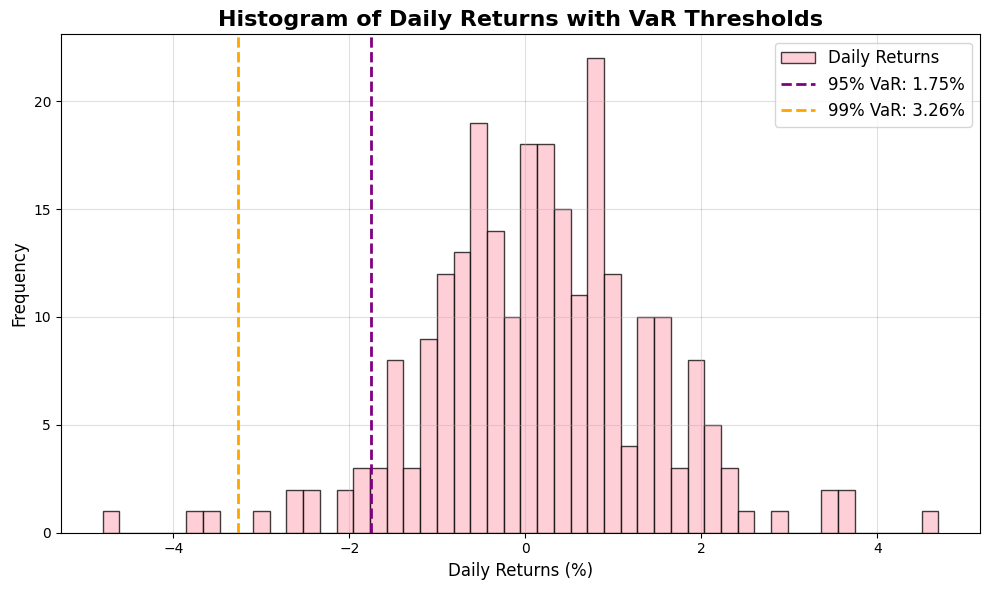

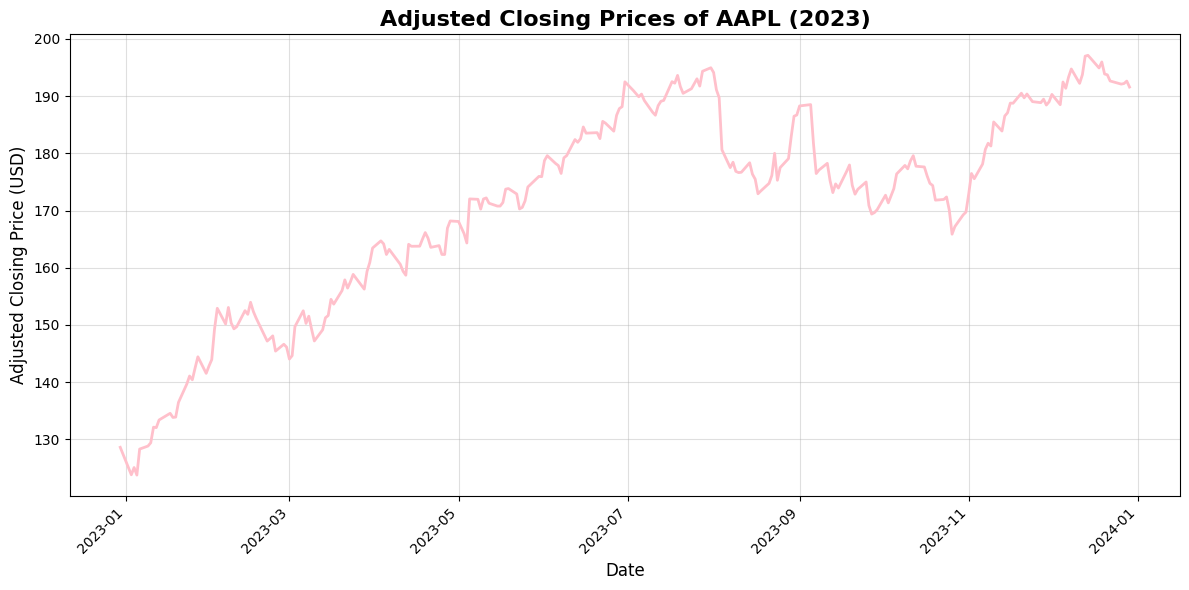

In [ ]:
import matplotlib.pyplot as plt

# Convert daily returns to percentage
returns_percentage = returns * 100

# Histogram for Daily Returns with VaR Thresholds
plt.figure(figsize=(10, 6))
plt.hist(returns_percentage, bins=50, alpha=0.75, color='pink', edgecolor='black', label='Daily Returns')
plt.axvline(var_95 * 100, color='purple', linestyle='--', linewidth=2, label=f'95% VaR: {-var_95 * 100:.2f}%')
plt.axvline(var_99 * 100, color='orange', linestyle='--', linewidth=2, label=f'99% VaR: {-var_99 * 100:.2f}%')
plt.title('Histogram of Daily Returns with VaR Thresholds', fontsize=16, weight='bold')
plt.xlabel('Daily Returns (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.4)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Line Chart for Adjusted Closing Prices of AAPL
plt.figure(figsize=(12, 6))
plt.plot(prices.index, prices.values, color='pink', linewidth=2)
plt.title('Adjusted Closing Prices of AAPL (2023)', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Closing Price (USD)', fontsize=12)
plt.grid(alpha=0.4)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()